In [ ]:
# Wave form -> frequency 도메인에서 보면 spectrogram (x축 time, y 축 frequency)
# Spectrum은 given time point에서만 보는 것, spectrogram은 그것을 시간축으로 쭉 나열해서 보는 것

In [8]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter 

In [9]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz  #440, 880, 1760..으로 바꿔서 소리 들어보기 -> 모두 옥타브가 다른'라(A)'의 소리가 남

In [10]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [11]:
# generate phase
theta = t * 2*np.pi * freq

In [12]:
# generate signal by cosine-phasor
s = amp*np.cos(theta) 
##sin 대신에 cos 써보기 
# -> 시작점이 달라지나 1 초 동안에 몇번 왔다갔다 하는지는 동일(frequency가 440으로 동일하기 때문)
# -> 정도는 pi/2, 90도의 차이가 있음

# 얼만큼 이동하던 소리가 달라지지는 않음 (ex. pi/8만큼 이동해도 소리는 동일)
 # -> phase(각도)에는 우리 귀가 sensitive 하지 않다; 인식 못함
 # frequency에 대해서는 sensitivity를 가지고 있음; 변화를 인식 가능

<IPython.core.display.Javascript object>


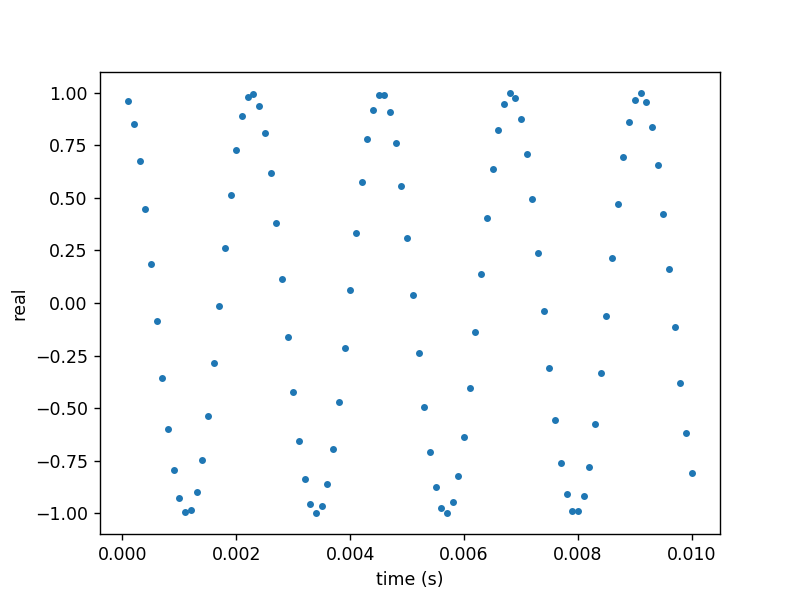

Text(0, 0.5, 'real')

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.') #0.01초까지 display됨
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [7]:
ipd.Audio(s, rate = sr)

In [14]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

<IPython.core.display.Javascript object>


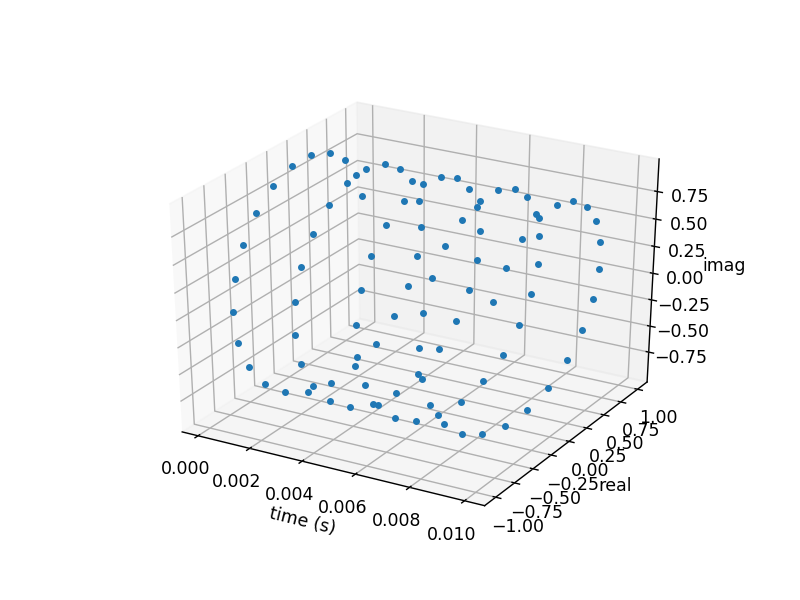

Text(0.5, 0, 'imag')

In [15]:
# complex number 자체는 plotting이 안됨, a,b를 각각 가져와서 2차원에 plotting?
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
ipd.Audio(c.real, rate = sr) # cos에서 받는 값 = c.real # sine function을 썼다면 = c. imag

<IPython.core.display.Javascript object>


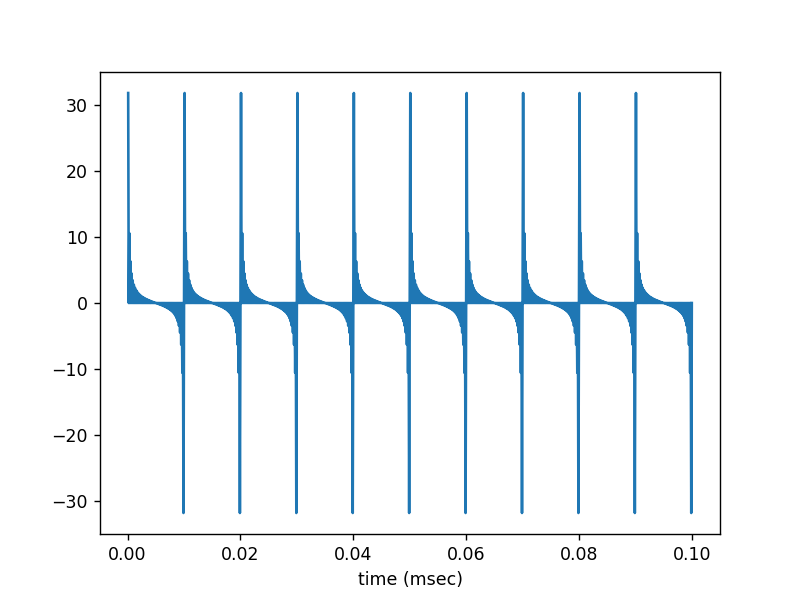

In [16]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr) 
# 그림은 waveform, spectrogram이 아님

In [18]:
#function을 만드는 방법
# def + function name + (쓰고 싶은 '입력'들) # return은 '출력' 
def hz2w(F, sr):   # F는 frequncy
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW): # srate는 sampling rate # BW는 bandwidth
    a2 = np.exp(-hz2w(BW,srate)) # resonance 함수 속에서 hz2w 함수를 불러옴?
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [21]:
RG = 0  # RG is the frequency of the Glottal Resonator 
# RG : 산맥의 위치를 적는 것 -> x 축이 frequency니까 그 값을 주면 됨
# RG = 0 :frequency가 0인 위치에다가 아주 완만한 산을 만들어라 -> (+) 쪽으로 gradually decreasing하는 shape이 생김
BWG = 100  
# BWG is the bandwidth of the Glottal Resonator# BW (bandwidth) : 산맥의 shape이 얼마나 뚱뚱(width가 큼)하거나 뾰족한지("작음)
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
# 조금 더 부드러운 소리가 남

In [22]:
# first formant 만들기
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [23]:
# second formant
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator # 60보다는 더 뚱뚱한 산맥
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [24]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [25]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [26]:
# 입술이 있는 상태 -> 더 큰 소리
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr) 